<a href="https://colab.research.google.com/github/AnovaYoung/AI-System-for-Image-Restoration-and-Enhancement/blob/Data/DataCollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycocotools

Combining COCO and TinyImageNet into one Dataset

In [ ]:
import tensorflow as tf

# Check if GPU is available
if tf.config.list_physical_devices('GPU'):
    print("GPU is enabled and available.")
else:
    print("GPU is not available. Please ensure you enabled it in Runtime settings.")


GPU is enabled and available.


In [ ]:
# Update TensorFlow or PyTorch for GPU compatibility
!pip install --upgrade tensorflow
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
# Check GPU details for TensorFlow

import tensorflow as tf
tf.debugging.set_log_device_placement(True)

In [ ]:
import torch

# Check if PyTorch is using the GPU
if torch.cuda.is_available():
    print(f"PyTorch is using GPU: {torch.cuda.get_device_name(0)}")
else:
    print("PyTorch is not using GPU.")


PyTorch is using GPU: Tesla T4


In [ ]:
# Install necessary libraries
!pip install kaggle kagglehub pycocotools

import os
import kagglehub
from pycocotools.coco import COCO
import requests
import zipfile

# Define base directories
base_dir = "/content/data"
os.makedirs(base_dir, exist_ok=True)

# --------------------------------------
# STEP 1: Download Tiny ImageNet
# --------------------------------------
print("Downloading Tiny ImageNet...")
tiny_imagenet_path = kagglehub.dataset_download("akash2sharma/tiny-imagenet")
tiny_imagenet_dir = os.path.join(base_dir, "tiny_imagenet")
os.makedirs(tiny_imagenet_dir, exist_ok=True)

# Move Tiny ImageNet to base_dir
!cp -r {tiny_imagenet_path}/* {tiny_imagenet_dir}
print("Tiny ImageNet downloaded and extracted to:", tiny_imagenet_dir)

# --------------------------------------
# STEP 2: Download COCO Dataset
# --------------------------------------
print("Downloading COCO Dataset...")
coco_url = "http://images.cocodataset.org/zips/train2017.zip"
coco_dir = os.path.join(base_dir, "coco")
os.makedirs(coco_dir, exist_ok=True)

# Download and extract COCO
coco_zip_path = os.path.join(coco_dir, "train2017.zip")
!wget {coco_url} -O {coco_zip_path}
with zipfile.ZipFile(coco_zip_path, "r") as zip_ref:
    zip_ref.extractall(coco_dir)
os.remove(coco_zip_path)  # Clean up the zip file
print("COCO Dataset downloaded and extracted to:", coco_dir)

# --------------------------------------
# STEP 3: Verify Both Datasets
# --------------------------------------
def verify_dataset(directory, sample_files=5):
    print(f"\nVerifying dataset at {directory}:")
    if os.path.exists(directory) and os.listdir(directory):
        print(f"Found {len(os.listdir(directory))} files/folders.")
        print(f"Sample files: {os.listdir(directory)[:sample_files]}")
    else:
        print(f"No files found in {directory}.")

verify_dataset(tiny_imagenet_dir)

verify_dataset(os.path.join(coco_dir, "train2017"))


Tiny ImageNet downloaded and extracted to: /content/data/tiny_imagenet
--2024-11-28 06:46:36--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.28.130, 3.5.27.76, 3.5.0.9, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.28.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘/content/data/coco/train2017.zip’

/content/data/coco/ 100%[===================>]  18.01G  50.1MB/s    in 5m 36s  

2024-11-28 06:52:11 (55.0 MB/s) - ‘/content/data/coco/train2017.zip’ saved [19336861798/19336861798]

COCO Dataset downloaded and extracted to: /content/data/coco

Verifying dataset at /content/data/tiny_imagenet:
Found 1 files/folders.
Sample files: ['tiny-imagenet-200']

Verifying dataset at /content/data/coco/train2017:
Found 118287 files/folders.
Sample files: ['000000245481.jpg', '000000527048.jpg', '000000581022.jpg', '000000090659.jpg', 

In [ ]:
# Tiny ImageNet directory
tiny_imagenet_dir = "/content/data/tiny_imagenet/tiny-imagenet-200"

# COCO train2017 directory
coco_dir = "/content/data/coco/train2017"

# List sample files in Tiny ImageNet
print("Tiny ImageNet Sample Files:")
print(os.listdir(tiny_imagenet_dir)[:5])

# List sample files in COCO train2017
print("\nCOCO Train2017 Sample Files:")
print(os.listdir(coco_dir)[:5])


Tiny ImageNet Sample Files:
['words.txt', 'wnids.txt', 'val', 'tiny-imagenet-200', 'train']

COCO Train2017 Sample Files:
['000000245481.jpg', '000000527048.jpg', '000000581022.jpg', '000000090659.jpg', '000000427990.jpg']


In [ ]:
# List class subdirectories inside the train directory
train_dir = "/content/data/tiny_imagenet/tiny-imagenet-200/train"
print("Class directories in Tiny ImageNet Train:")
print(os.listdir(train_dir)[:5])  # Display a sample of class subdirectories


Class directories in Tiny ImageNet Train:
['n02002724', 'n04532670', 'n03649909', 'n03983396', 'n07579787']


In [ ]:
# Choose a sample class directory
sample_class_dir = os.path.join(train_dir, os.listdir(train_dir)[0])  # First class directory
print(f"Contents of {sample_class_dir}:")
print(os.listdir(sample_class_dir))  # Display contents of the class directory

# Check the images folder
images_dir = os.path.join(sample_class_dir, "images")
print(f"Contents of {images_dir}:")
print(os.listdir(images_dir)[:5])  # Display a sample of image files


Contents of /content/data/tiny_imagenet/tiny-imagenet-200/train/n02002724:
['images', 'n02002724_boxes.txt']
Contents of /content/data/tiny_imagenet/tiny-imagenet-200/train/n02002724/images:
['n02002724_398.JPEG', 'n02002724_432.JPEG', 'n02002724_277.JPEG', 'n02002724_464.JPEG', 'n02002724_48.JPEG']


Does the Tiny ImageNet image exist? True


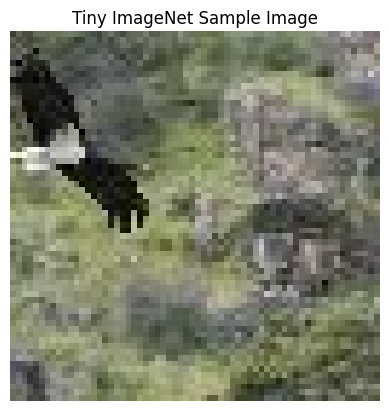

In [ ]:
# Path to a sample image
tiny_imagenet_sample_image_path = os.path.join(images_dir, os.listdir(images_dir)[0])

# Check if the file exists
print(f"Does the Tiny ImageNet image exist? {os.path.exists(tiny_imagenet_sample_image_path)}")

# Load and display the image
import cv2
import matplotlib.pyplot as plt

if os.path.exists(tiny_imagenet_sample_image_path):
    img = cv2.imread(tiny_imagenet_sample_image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Tiny ImageNet Sample Image")
    plt.show()
else:
    print("Tiny ImageNet sample image not found.")


**Repeat for Validation Set**

In [ ]:
# Path to the validation directory
val_dir = "/content/data/tiny_imagenet/tiny-imagenet-200/val"

# List contents of the validation directory
print("Contents of the Tiny ImageNet Validation Directory:")
print(os.listdir(val_dir))


Contents of the Tiny ImageNet Validation Directory:
['images', 'val_annotations.txt']


**Organize Validation Set**

The validation set’s images folder contains all validation images in a flat structure. To use it effectively, it will be organized by class based on the val_annotations.txt

In [ ]:
val_annotations_path = "/content/data/tiny_imagenet/tiny-imagenet-200/val/val_annotations.txt"

# Read the annotations file
val_annotations = {}
with open(val_annotations_path, "r") as f:
    for line in f:
        parts = line.strip().split("\t")
        val_annotations[parts[0]] = parts[1]  # Map image name to class

# Display a sample of the parsed annotations
print("Sample validation annotations:", list(val_annotations.items())[:5])


Sample validation annotations: [('val_0.JPEG', 'n03444034'), ('val_1.JPEG', 'n04067472'), ('val_2.JPEG', 'n04070727'), ('val_3.JPEG', 'n02808440'), ('val_4.JPEG', 'n02808440')]


**Organize Validation Images**

In [ ]:
import shutil
val_images_dir = "/content/data/tiny_imagenet/tiny-imagenet-200/val/images"
organized_val_dir = "/content/data/tiny_imagenet/tiny-imagenet-200/val/organized"

# Create organized directory structure
os.makedirs(organized_val_dir, exist_ok=True)
for image_name, class_name in val_annotations.items():
    class_dir = os.path.join(organized_val_dir, class_name)
    os.makedirs(class_dir, exist_ok=True)
    src_path = os.path.join(val_images_dir, image_name)
    dst_path = os.path.join(class_dir, image_name)
    shutil.move(src_path, dst_path)

print("Validation images organized by class.")

Validation images organized by class.


In [ ]:
def convert_to_img(directory):
    """
    Renames all image files in the given directory and its subdirectories to have a .img extension.
    """
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpeg', '.jpg', '.png')):
                old_path = os.path.join(root, file)
                new_path = os.path.splitext(old_path)[0] + '.img'
                os.rename(old_path, new_path)

# Convert images in Tiny ImageNet
tiny_imagenet_dir = "/content/data/tiny_imagenet/tiny-imagenet-200"
convert_to_img(tiny_imagenet_dir)
print("Tiny ImageNet images standardized to .img.")


Tiny ImageNet images standardized to .img.


In [ ]:
# Convert images in COCO dataset
coco_dir = "/content/data/coco/train2017"
convert_to_img(coco_dir)
print("COCO images standardized to .img.")

COCO images standardized to .img.


Does the Tiny ImageNet image exist? True


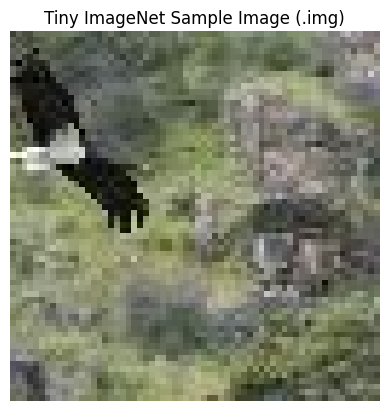

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Path to a sample Tiny ImageNet image
tiny_imagenet_sample_image_path = "/content/data/tiny_imagenet/tiny-imagenet-200/train/n02002724/images/n02002724_398.img"

# Check if the file exists
print(f"Does the Tiny ImageNet image exist? {os.path.exists(tiny_imagenet_sample_image_path)}")

# Load and display the image
if os.path.exists(tiny_imagenet_sample_image_path):
    img = cv2.imread(tiny_imagenet_sample_image_path)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title("Tiny ImageNet Sample Image (.img)")
        plt.show()
    else:
        print("The file exists but could not be loaded as an image. Ensure it is a valid image format.")
else:
    print("Tiny ImageNet sample image not found.")


Does the COCO image exist? True


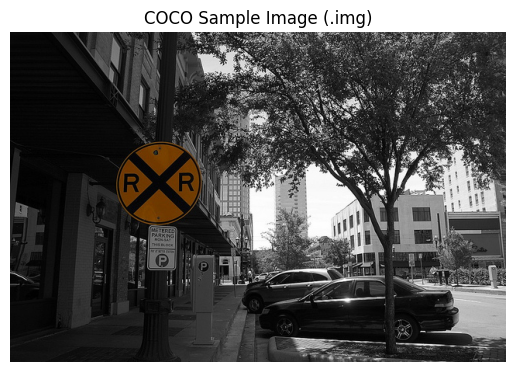

In [ ]:
# Path to a sample COCO image
coco_sample_image_path = "/content/data/coco/train2017/000000245481.img"

# Check if the file exists
print(f"Does the COCO image exist? {os.path.exists(coco_sample_image_path)}")

# Load and display the image
if os.path.exists(coco_sample_image_path):
    img = cv2.imread(coco_sample_image_path)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title("COCO Sample Image (.img)")
        plt.show()
    else:
        print("The file exists but could not be loaded as an image. Ensure it is a valid image format.")
else:
    print("COCO sample image not found.")


# Organize and Save as a Unified Zip File

In [ ]:
!zip -r unified_dataset.zip /content/data/tiny_imagenet /content/data/coco

Streaming output truncated to the last 5000 lines.
  adding: content/data/coco/train2017/000000298614.img (deflated 0%)
  adding: content/data/coco/train2017/000000459731.img (deflated 0%)
  adding: content/data/coco/train2017/000000153749.img (deflated 3%)
  adding: content/data/coco/train2017/000000452700.img (deflated 0%)
  adding: content/data/coco/train2017/000000398172.img (deflated 0%)
  adding: content/data/coco/train2017/000000424172.img (deflated 0%)
  adding: content/data/coco/train2017/000000507196.img (deflated 0%)
  adding: content/data/coco/train2017/000000245440.img (deflated 1%)
  adding: content/data/coco/train2017/000000252863.img (deflated 0%)
  adding: content/data/coco/train2017/000000496322.img (deflated 1%)
  adding: content/data/coco/train2017/000000169562.img (deflated 0%)
  adding: content/data/coco/train2017/000000432119.img (deflated 0%)
  adding: content/data/coco/train2017/000000461410.img (deflated 0%)
  adding: content/data/coco/train2017/000000068857.i

# STANDARDIZING AND METADATA CREATION

In [ ]:
import pandas as pd
from shutil import copy2
import os
import random
from multiprocessing import Pool, cpu_count

# Base paths
unified_dataset_dir = "/content/unified_dataset_extracted"
os.makedirs(unified_dataset_dir, exist_ok=True)

metadata = []

# --------------------------------------
# STEP 1: Extract Existing Dataset
# --------------------------------------
print("Extracting existing dataset from zip file...")
os.system(f"unzip -o /content/unified_dataset.zip -d {unified_dataset_dir}")

# --------------------------------------
# STEP 2: Helper Function for File Copying
# --------------------------------------
def copy_file_with_metadata(args):
    src, dest, task, source, augmentation_type = args
    dest = os.path.splitext(dest)[0] + ".img"  # Standardize to .img
    copy2(src, dest)  # Use copy2 for metadata preservation
    return {
        "image_path": dest,
        "task": task,
        "source": source,
        "augmentation_type": augmentation_type,
    }

# --------------------------------------
# STEP 3: Process Datasets
# --------------------------------------

# Tiny ImageNet
def process_tiny_imagenet():
    print("Processing Tiny ImageNet...")
    tiny_imagenet_dir = "/content/data/tiny_imagenet/tiny-imagenet-200/train"
    tiny_imagenet_files = []
    for class_dir in os.listdir(tiny_imagenet_dir):
        class_path = os.path.join(tiny_imagenet_dir, class_dir, "images")
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                src_path = os.path.join(class_path, img_file)
                dest_path = os.path.join(unified_dataset_dir, f"tiny_imagenet_{img_file}")
                tiny_imagenet_files.append((src_path, dest_path, "denoising", "Tiny ImageNet", "none"))

    with Pool(cpu_count()) as pool:
        return pool.map(copy_file_with_metadata, tiny_imagenet_files)

# COCO
def process_coco():
    print("Processing COCO Dataset...")
    coco_dir = "/content/data/coco/train2017"
    coco_images = [os.path.join(coco_dir, img) for img in os.listdir(coco_dir)]
    random.shuffle(coco_images)
    coco_subset = coco_images[:100000]
    coco_files = [
        (src_path, os.path.join(unified_dataset_dir, f"coco_{os.path.basename(src_path)}"), "inpainting", "COCO", "none")
        for src_path in coco_subset
    ]

    with Pool(cpu_count()) as pool:
        return pool.map(copy_file_with_metadata, coco_files)

# --------------------------------------
# STEP 4: Process All and Save Metadata
# --------------------------------------
metadata.extend(process_tiny_imagenet())
metadata.extend(process_coco())

print("Saving metadata...")
metadata_df = pd.DataFrame(metadata)
metadata_csv_path = "/content/unified_dataset_balanced.csv"
metadata_df.to_csv(metadata_csv_path, index=False)
print(f"Unified dataset metadata saved to: {metadata_csv_path}")

print(metadata_df.tail())

# --------------------------------------
# STEP 5: Re-Zip Updated Dataset
# --------------------------------------
print("Re-zipping updated dataset...")
os.system(f"zip -r /content/unified_dataset.zip {unified_dataset_dir}")


Extracting existing dataset from zip file...
Processing Tiny ImageNet...
Processing COCO Dataset...
Saving metadata...
Unified dataset metadata saved to: /content/unified_dataset_balanced.csv
                                               image_path        task source  \
199995  /content/unified_dataset_extracted/coco_000000...  inpainting   COCO   
199996  /content/unified_dataset_extracted/coco_000000...  inpainting   COCO   
199997  /content/unified_dataset_extracted/coco_000000...  inpainting   COCO   
199998  /content/unified_dataset_extracted/coco_000000...  inpainting   COCO   
199999  /content/unified_dataset_extracted/coco_000000...  inpainting   COCO   

       augmentation_type  
199995              none  
199996              none  
199997              none  
199998              none  
199999              none  
Re-zipping updated dataset...


0

In [ ]:
!du -sh /content/unified_dataset.zip


53G	/content/unified_dataset.zip


In [ ]:
!unzip -l /content/unified_dataset.zip | head -n 20

Archive:  /content/unified_dataset.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2024-11-28 06:39   content/data/tiny_imagenet/
        0  2024-11-28 06:39   content/data/tiny_imagenet/tiny-imagenet-200/
  2655750  2024-11-28 06:46   content/data/tiny_imagenet/tiny-imagenet-200/words.txt
     2000  2024-11-28 06:46   content/data/tiny_imagenet/tiny-imagenet-200/wnids.txt
        0  2024-11-28 06:55   content/data/tiny_imagenet/tiny-imagenet-200/val/
        0  2024-11-28 06:55   content/data/tiny_imagenet/tiny-imagenet-200/val/organized/
        0  2024-11-28 06:55   content/data/tiny_imagenet/tiny-imagenet-200/val/organized/n02002724/
     1750  2024-11-28 06:46   content/data/tiny_imagenet/tiny-imagenet-200/val/organized/n02002724/val_1031.img
     1823  2024-11-28 06:46   content/data/tiny_imagenet/tiny-imagenet-200/val/organized/n02002724/val_2829.img
     2275  2024-11-28 06:46   content/data/tiny_imagenet/tiny-imagenet-200/val/organized/n020

In [ ]:
# Extract a limited number of files (first 10 files only)
!unzip -j /content/unified_dataset.zip -d /content/sample_extracted_files | head -n 10

Archive:  /content/unified_dataset.zip
  inflating: /content/sample_extracted_files/words.txt  
  inflating: /content/sample_extracted_files/wnids.txt  
  inflating: /content/sample_extracted_files/val_1031.img  
  inflating: /content/sample_extracted_files/val_2829.img  
  inflating: /content/sample_extracted_files/val_1936.img  
  inflating: /content/sample_extracted_files/val_9362.img  
  inflating: /content/sample_extracted_files/val_2111.img  
  inflating: /content/sample_extracted_files/val_985.img  
  inflating: /content/sample_extracted_files/val_9326.img  


**Confirm these images can be loaded and displayed**

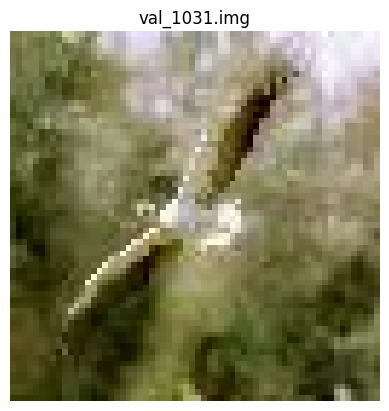

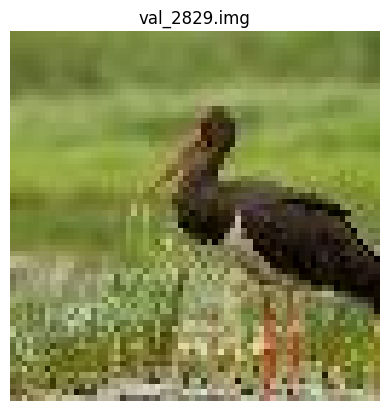

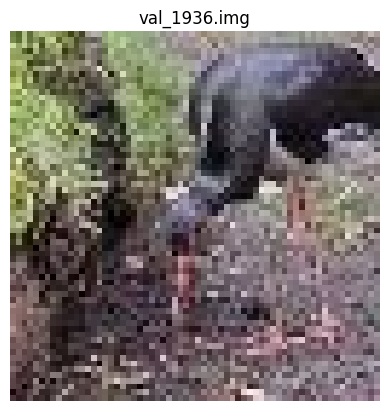

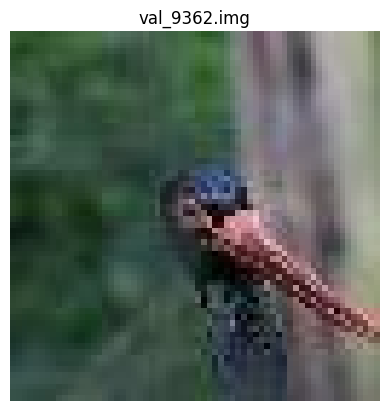

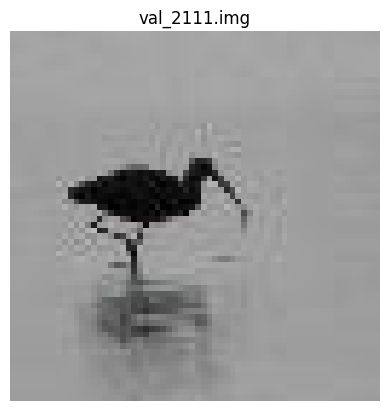

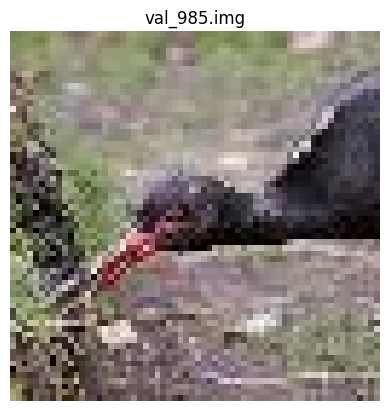

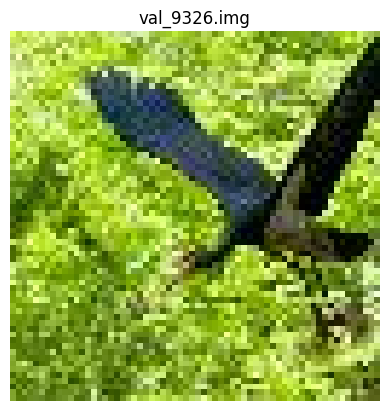

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# Directory containing extracted files
sample_dir = "/content/sample_extracted_files"

# List the specific files to display
files_to_display = [
    "val_1031.img",
    "val_2829.img",
    "val_1936.img",
    "val_9362.img",
    "val_2111.img",
    "val_985.img",
    "val_9326.img",
]

# Loop through the specified files and display them
for file_name in files_to_display:
    file_path = os.path.join(sample_dir, file_name)
    if os.path.exists(file_path):
        img = cv2.imread(file_path)
        if img is not None:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display
            plt.imshow(img_rgb)
            plt.axis('off')
            plt.title(file_name)
            plt.show()
        else:
            print(f"Failed to load image: {file_name}")
    else:
        print(f"File not found: {file_name}")


In [ ]:
import pandas as pd

# Load the metadata CSV
metadata_csv_path = "/content/unified_dataset_balanced.csv"  # Adjusted to the correct path
metadata_df = pd.read_csv(metadata_csv_path)

# Print the dataset summary
print("Dataset Summary:")
print(metadata_df.info())

# Check task distribution
print("\nTask Distribution:")
print(metadata_df['task'].value_counts())

# Check source distribution
print("\nSource Distribution:")
print(metadata_df['source'].value_counts())

# Check augmentation type distribution
if 'augmentation_type' in metadata_df.columns:
    print("\nAugmentation Type Distribution:")
    print(metadata_df['augmentation_type'].value_counts())
else:
    print("\nColumn 'augmentation_type' not found in metadata.")


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   image_path         200000 non-null  object
 1   task               200000 non-null  object
 2   source             200000 non-null  object
 3   augmentation_type  200000 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB
None

Task Distribution:
task
denoising     100000
inpainting    100000
Name: count, dtype: int64

Source Distribution:
source
Tiny ImageNet    100000
COCO             100000
Name: count, dtype: int64

Augmentation Type Distribution:
augmentation_type
none    200000
Name: count, dtype: int64


# Next Pull and Process DIV2K for Super-Resolution

**What is DIV2K?**

A high-quality dataset designed for super-resolution tasks.
Provides paired low-resolution (downscaled) and high-resolution images.

In [ ]:
import os
import requests
import zipfile

# Paths and Directories
base_dir = "/content/data"
div2k_dir = os.path.join(base_dir, "DIV2K")
os.makedirs(div2k_dir, exist_ok=True)

# DIV2K Dataset URL (Train High-Resolution Images)
div2k_url = "https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip"
div2k_zip_path = os.path.join(div2k_dir, "DIV2K_train_HR.zip")

# --------------------------------------------
# Step 1: Download DIV2K Dataset
# --------------------------------------------

if not os.path.exists(div2k_zip_path):
    print("Downloading DIV2K dataset...")
    response = requests.get(div2k_url, stream=True)
    with open(div2k_zip_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("DIV2K dataset downloaded.")
else:
    print("DIV2K dataset already downloaded.")

# --------------------------------------------
# Step 2: Extract DIV2K Dataset
# --------------------------------------------

with zipfile.ZipFile(div2k_zip_path, "r") as zip_ref:
    zip_ref.extractall(div2k_dir)
os.remove(div2k_zip_path)  # Clean up the zip file
print("DIV2K dataset extracted.")

# Verify extracted files
div2k_hr_dir = os.path.join(div2k_dir, "DIV2K_train_HR")
print(f"Sample files from DIV2K: {os.listdir(div2k_hr_dir)[:5]}")


DIV2K dataset downloaded.
DIV2K dataset extracted.
Sample files from DIV2K: ['0719.png', '0608.png', '0084.png', '0478.png', '0691.png']


**HIGH RESOLUTION IMAGES**

In [ ]:
from shutil import copyfile
import os

# Directories for high-resolution images
div2k_hr_dir = "/content/data/DIV2K/DIV2K_train_HR"
div2k_output_dir = "/content/unified_dataset_extracted/super_resolution_hr"
os.makedirs(div2k_output_dir, exist_ok=True)

# Copy high-resolution images
print("Copying high-resolution images...")
for img_file in os.listdir(div2k_hr_dir):
    hr_img_path = os.path.join(div2k_hr_dir, img_file)
    output_img_path = os.path.join(div2k_output_dir, img_file)
    copyfile(hr_img_path, output_img_path)

print(f"High-resolution images copied to {div2k_output_dir}.")


Copying high-resolution images...
High-resolution images copied to /content/unified_dataset_extracted/super_resolution_hr.


**LOW RESOLUTION IMAGES**

In [ ]:
from PIL import Image
import os

# Directories for low-resolution images
div2k_lr_dir = "/content/unified_dataset_extracted/super_resolution_lr"
os.makedirs(div2k_lr_dir, exist_ok=True)

# Downscale images
def downscale_image(input_path, output_path, scale_factor=4):
    """Downscale high-resolution images to create low-resolution images."""
    img = Image.open(input_path)
    img = img.resize((img.size[0] // scale_factor, img.size[1] // scale_factor), Image.BICUBIC)
    img.save(output_path)

print("Creating low-resolution images...")
for img_file in os.listdir(div2k_hr_dir):
    hr_img_path = os.path.join(div2k_hr_dir, img_file)
    lr_img_path = os.path.join(div2k_lr_dir, img_file)  # Keep as .png for now
    downscale_image(hr_img_path, lr_img_path)

print(f"Low-resolution images created in {div2k_lr_dir}.")

Creating low-resolution images...
Low-resolution images created in /content/unified_dataset_extracted/super_resolution_lr.


**Rename .png to .img (Both Directories):**

In [ ]:
# Standardize extensions to .img
def rename_to_img(directory):
    for file_name in os.listdir(directory):
        if file_name.endswith(".png"):
            old_path = os.path.join(directory, file_name)
            new_path = os.path.join(directory, os.path.splitext(file_name)[0] + ".img")
            os.rename(old_path, new_path)
            print(f"Renamed: {file_name} -> {os.path.basename(new_path)}")

print("Renaming high-resolution images to .img...")
rename_to_img(div2k_output_dir)

print("Renaming low-resolution images to .img...")
rename_to_img(div2k_lr_dir)

print("File extensions standardized to .img.")

Renaming high-resolution images to .img...
Renamed: 0719.png -> 0719.img
Renamed: 0608.png -> 0608.img
Renamed: 0084.png -> 0084.img
Renamed: 0478.png -> 0478.img
Renamed: 0691.png -> 0691.img
Renamed: 0048.png -> 0048.img
Renamed: 0633.png -> 0633.img
Renamed: 0520.png -> 0520.img
Renamed: 0656.png -> 0656.img
Renamed: 0744.png -> 0744.img
Renamed: 0018.png -> 0018.img
Renamed: 0235.png -> 0235.img
Renamed: 0379.png -> 0379.img
Renamed: 0667.png -> 0667.img
Renamed: 0450.png -> 0450.img
Renamed: 0511.png -> 0511.img
Renamed: 0227.png -> 0227.img
Renamed: 0544.png -> 0544.img
Renamed: 0506.png -> 0506.img
Renamed: 0466.png -> 0466.img
Renamed: 0212.png -> 0212.img
Renamed: 0567.png -> 0567.img
Renamed: 0785.png -> 0785.img
Renamed: 0653.png -> 0653.img
Renamed: 0451.png -> 0451.img
Renamed: 0471.png -> 0471.img
Renamed: 0762.png -> 0762.img
Renamed: 0442.png -> 0442.img
Renamed: 0257.png -> 0257.img
Renamed: 0119.png -> 0119.img
Renamed: 0260.png -> 0260.img
Renamed: 0750.png -> 0750.i

In [ ]:
import os

def convert_png_to_img(directory):
    for file_name in os.listdir(directory):
        if file_name.endswith(".png"):
            old_path = os.path.join(directory, file_name)
            new_path = os.path.join(directory, os.path.splitext(file_name)[0] + ".img")
            os.rename(old_path, new_path)
            print(f"Renamed: {file_name} -> {os.path.basename(new_path)}")
        elif file_name.endswith(".img"):
            # Skip files that already have .img extension
            print(f"Skipped: {file_name} (already .img)")
        else:
            # Skip files that are neither .png nor .img
            print(f"Skipped: {file_name} (unsupported format)")

# Path to DIV2K high-resolution images
div2k_hr_dir = "/content/data/DIV2K/DIV2K_train_HR"

print("Converting .png files to .img...")
convert_png_to_img(div2k_hr_dir)
print("Conversion complete.")

# Verify the renamed files
print(f"Sample files from DIV2K after conversion: {os.listdir(div2k_hr_dir)[:10]}")


Converting .png files to .img...
Renamed: 0719.png -> 0719.img
Renamed: 0608.png -> 0608.img
Renamed: 0084.png -> 0084.img
Renamed: 0478.png -> 0478.img
Renamed: 0691.png -> 0691.img
Renamed: 0048.png -> 0048.img
Renamed: 0633.png -> 0633.img
Renamed: 0520.png -> 0520.img
Renamed: 0656.png -> 0656.img
Renamed: 0744.png -> 0744.img
Renamed: 0018.png -> 0018.img
Renamed: 0235.png -> 0235.img
Renamed: 0379.png -> 0379.img
Renamed: 0667.png -> 0667.img
Renamed: 0450.png -> 0450.img
Renamed: 0511.png -> 0511.img
Renamed: 0227.png -> 0227.img
Renamed: 0544.png -> 0544.img
Renamed: 0506.png -> 0506.img
Renamed: 0466.png -> 0466.img
Renamed: 0212.png -> 0212.img
Renamed: 0567.png -> 0567.img
Renamed: 0785.png -> 0785.img
Renamed: 0653.png -> 0653.img
Renamed: 0451.png -> 0451.img
Renamed: 0471.png -> 0471.img
Renamed: 0762.png -> 0762.img
Renamed: 0442.png -> 0442.img
Renamed: 0257.png -> 0257.img
Renamed: 0119.png -> 0119.img
Renamed: 0260.png -> 0260.img
Renamed: 0750.png -> 0750.img
Renamed

Way too few examples. Lets pull more data for the Super-resolution
task.

**Proposed Plan**

Combine Multiple Sources:

Pull **CIFAR-10/100** and **CelebA-HQ**.

Repurpose Tiny ImageNet or COCO subsets for super-resolution after pulling the above datasets, if needed.

**Augment Existing DIV2K Data:**

Use additional transformations to expand the current dataset (if needeed).

**Target Balance:**

Aim for ~50,000–100,000 examples for super-resolution to match other tasks.

# Pull and Process CIFAR-10 and CIFAR-100

In [ ]:
import os
import zipfile
from keras.datasets import cifar10, cifar100
from PIL import Image

# Paths for CIFAR datasets
cifar_dir = "/content/data/cifar"
cifar10_lr_dir = os.path.join(cifar_dir, "cifar10_lr")
cifar10_hr_dir = os.path.join(cifar_dir, "cifar10_hr")
cifar100_lr_dir = os.path.join(cifar_dir, "cifar100_lr")
cifar100_hr_dir = os.path.join(cifar_dir, "cifar100_hr")

os.makedirs(cifar10_lr_dir, exist_ok=True)
os.makedirs(cifar10_hr_dir, exist_ok=True)
os.makedirs(cifar100_lr_dir, exist_ok=True)
os.makedirs(cifar100_hr_dir, exist_ok=True)

# Function to save low-res and high-res images
def process_cifar(data, lr_dir, hr_dir, resize_factor=2):
    for i, img_array in enumerate(data[:50000]):  # Limit to 50,000 images
        hr_img = Image.fromarray(img_array)
        lr_img = hr_img.resize(
            (hr_img.width // resize_factor, hr_img.height // resize_factor), Image.BICUBIC
        )

        # Save images
        hr_path = os.path.join(hr_dir, f"{i}_hr.png")
        lr_path = os.path.join(lr_dir, f"{i}_lr.png")
        hr_img.save(hr_path)
        lr_img.save(lr_path)

# Load and process CIFAR-10
print("Processing CIFAR-10...")
(train_images, _), (_, _) = cifar10.load_data()
process_cifar(train_images, cifar10_lr_dir, cifar10_hr_dir)

# Load and process CIFAR-100
print("Processing CIFAR-100...")
(train_images, _), (_, _) = cifar100.load_data()
process_cifar(train_images, cifar100_lr_dir, cifar100_hr_dir)


Processing CIFAR-10...
Processing CIFAR-100...


**Verify Processed Image Count**

In [ ]:
# Function to list sample files
def list_sample_files(directory, n=5):
    files = os.listdir(directory)
    print(f"Sample files from {directory}:")
    print(files[:n])

# List sample files for CIFAR-10 and CIFAR-100 (low-res and high-res)
print("CIFAR-10 Low-Resolution:")
list_sample_files(cifar10_lr_dir)

print("\nCIFAR-10 High-Resolution:")
list_sample_files(cifar10_hr_dir)

print("\nCIFAR-100 Low-Resolution:")
list_sample_files(cifar100_lr_dir)

print("\nCIFAR-100 High-Resolution:")
list_sample_files(cifar100_hr_dir)


CIFAR-10 Low-Resolution:
Sample files from /content/data/cifar/cifar10_lr:
['36113_lr.png', '25050_lr.png', '24670_lr.png', '10866_lr.png', '41600_lr.png']

CIFAR-10 High-Resolution:
Sample files from /content/data/cifar/cifar10_hr:
['29479_hr.png', '41699_hr.png', '18779_hr.png', '23227_hr.png', '48463_hr.png']

CIFAR-100 Low-Resolution:
Sample files from /content/data/cifar/cifar100_lr:
['36113_lr.png', '25050_lr.png', '24670_lr.png', '10866_lr.png', '41600_lr.png']

CIFAR-100 High-Resolution:
Sample files from /content/data/cifar/cifar100_hr:
['29479_hr.png', '41699_hr.png', '18779_hr.png', '23227_hr.png', '48463_hr.png']


In [ ]:
# Function to rename .png to .img
def rename_png_to_img(directory):
    for file_name in os.listdir(directory):
        if file_name.endswith(".png"):
            old_path = os.path.join(directory, file_name)
            new_path = os.path.join(directory, os.path.splitext(file_name)[0] + ".img")
            os.rename(old_path, new_path)
            print(f"Renamed: {file_name} -> {os.path.basename(new_path)}")

# Directories to process
directories = [cifar10_lr_dir, cifar10_hr_dir, cifar100_lr_dir, cifar100_hr_dir]

# Rename files in each directory
for directory in directories:
    print(f"Processing directory: {directory}")
    rename_png_to_img(directory)

print("All .png files have been renamed to .img.")


Streaming output truncated to the last 5000 lines.
Renamed: 20013_hr.png -> 20013_hr.img
Renamed: 14630_hr.png -> 14630_hr.img
Renamed: 45252_hr.png -> 45252_hr.img
Renamed: 34664_hr.png -> 34664_hr.img
Renamed: 13933_hr.png -> 13933_hr.img
Renamed: 21268_hr.png -> 21268_hr.img
Renamed: 20820_hr.png -> 20820_hr.img
Renamed: 49590_hr.png -> 49590_hr.img
Renamed: 5106_hr.png -> 5106_hr.img
Renamed: 44595_hr.png -> 44595_hr.img
Renamed: 6847_hr.png -> 6847_hr.img
Renamed: 9522_hr.png -> 9522_hr.img
Renamed: 26373_hr.png -> 26373_hr.img
Renamed: 5923_hr.png -> 5923_hr.img
Renamed: 25078_hr.png -> 25078_hr.img
Renamed: 46976_hr.png -> 46976_hr.img
Renamed: 22516_hr.png -> 22516_hr.img
Renamed: 5171_hr.png -> 5171_hr.img
Renamed: 26002_hr.png -> 26002_hr.img
Renamed: 32785_hr.png -> 32785_hr.img
Renamed: 10114_hr.png -> 10114_hr.img
Renamed: 25490_hr.png -> 25490_hr.img
Renamed: 34763_hr.png -> 34763_hr.img
Renamed: 3658_hr.png -> 3658_hr.img
Renamed: 1215_hr.png -> 1215_hr.img
Renamed: 1699

# Add CIFAR and DIV2K Data to the Unified Zip File

In [ ]:
# Paths to include in the unified zip file
directories_to_add = [
    cifar10_lr_dir,
    cifar10_hr_dir,
    cifar100_lr_dir,
    cifar100_hr_dir,
    "/content/unified_dataset_extracted"  # DIV2K and other existing datasets
]

zip_file_path = "/content/unified_dataset.zip"

print("Adding CIFAR and DIV2K data to the unified zip file...")

# Create or update the zip file
with zipfile.ZipFile(zip_file_path, "a") as zf:
    for directory in directories_to_add:
        for root, _, files in os.walk(directory):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, start="/content")  # Maintain relative paths
                zf.write(file_path, arcname)

print("Unified dataset zip file updated.")


Adding CIFAR and DIV2K data to the unified zip file...
Unified dataset zip file updated.


# OPTIONA FOR MORE DATA IN THE FUTURE

 **1. BSDS500 (Berkeley Segmentation Dataset):**

*Why:* Contains images and detailed annotations for edges, making it perfect for training edge completion models.

*What it Adds:* High-quality examples for edge prediction and image segmentation tasks.

**2. Historical Image Datasets (Optional for Context-Specific Colorization):**

*Why:* If you're focusing on historical or grayscale images, datasets like the World War II Database or Library of Congress Historical Photos can provide real-world examples.

*What it Adds:* Grayscale-to-color transformations and historically accurate colorization tasks.

**3. Places365 Dataset:**

*Why:* Useful for colorization because it contains a wide range of scene types (indoor, outdoor, landscapes, etc.).

*What it Adds:* Diverse natural colors and lighting conditions for the AI to learn realistic color mapping.




# Datasets so far.

1. **Tiny ImageNet**
Source: Tiny ImageNet dataset.
**Task: Denoising**
Removes noise from images to improve their clarity and restore details.
Size: 100,000 images.
Augmentation Type: none.
2. **COCO (Microsoft Common Objects in Context)**
Source: COCO 2017 dataset.
**Task: Inpainting**
Fills in missing or occluded parts of an image seamlessly.
Size: 100,000 images (randomly selected subset from COCO).
Augmentation Type: none.
3. **DIV2K**
Source: DIV2K (super-resolution benchmark dataset).
**Task: Super-Resolution**
Enhances the resolution of low-resolution images to recover finer details.
Size: 800 image pairs (high-res and downscaled versions).
Augmentation Type: downscaled for low-resolution images.
4. **CIFAR-10**
Source: CIFAR-10 dataset.
**Task: Super-Resolution**
Enhances the resolution of low-resolution images.
Size: 50,000 images (original dataset).
Augmentation Type: downscaled.
5. **CIFAR-100**
Source: CIFAR-100 dataset.
**Task: Super-Resolution**
Enhances the resolution of low-resolution images.
Size: 50,000 images (original dataset).
Augmentation Type: downscaled.